In [ ]:
'''
PyTorch 数据转换
在 PyTorch 中，数据转换（Data Transformation） 是一种在加载数据时对数据进行处理的机制，将原始数据转换成适合模型训练的格式，主要通过 torchvision.transforms 提供的工具完成。

数据转换不仅可以实现基本的数据预处理（如归一化、大小调整等），还能帮助进行数据增强（如随机裁剪、翻转等），提高模型的泛化能力。

为什么需要数据转换？
数据预处理：

调整数据格式、大小和范围，使其适合模型输入。
例如，图像需要调整为固定大小、张量格式并归一化到 [0,1]。
数据增强：

在训练时对数据进行变换，以增加多样性。
例如，通过随机旋转、翻转和裁剪增加数据样本的变种，避免过拟合。
灵活性：

通过定义一系列转换操作，可以动态地对数据进行处理，简化数据加载的复杂度。
在 PyTorch 中，torchvision.transforms 模块提供了多种用于图像处理的变换操作。
'''

图像张量大小: torch.Size([32, 1, 128, 128])


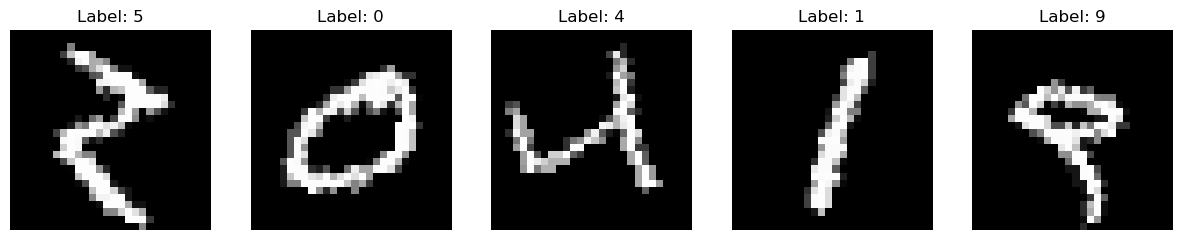

In [1]:
'''
基本变换方法
1、ToTensor

将 PIL 图像或 NumPy 数组转换为 PyTorch 张量。

同时将像素值从 [0, 255] 归一化为 [0, 1]。

from torchvision import transforms

transform = transforms.ToTensor()
2、Normalize

对数据进行标准化，使其符合特定的均值和标准差。

通常用于图像数据，将其像素值归一化为零均值和单位方差。

transform = transforms.Normalize(mean=[0.5], std=[0.5])  # 归一化到 [-1, 1]
3、Resize

调整图像的大小。

transform = transforms.Resize((128, 128))  # 将图像调整为 128x128
4、CenterCrop

从图像中心裁剪指定大小的区域。

transform = transforms.CenterCrop(128)  # 裁剪 128x128 的区域
'''

'''
数据增强方法
1、RandomCrop

从图像中随机裁剪指定大小。

transform = transforms.RandomCrop(128)
2、RandomHorizontalFlip

以一定概率水平翻转图像。

transform = transforms.RandomHorizontalFlip(p=0.5)  # 50% 概率翻转
3、RandomRotation

随机旋转一定角度。

transform = transforms.RandomRotation(degrees=30)  # 随机旋转 -30 到 +30 度
4、ColorJitter

随机改变图像的亮度、对比度、饱和度或色调。

transform = transforms.ColorJitter(brightness=0.5, contrast=0.5)
'''

#对图像数据集应用转换
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 定义转换
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# 加载数据集
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# 使用 DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# 查看转换后的数据
for images, labels in train_loader:
    print("图像张量大小:", images.size())  # [batch_size, 1, 128, 128]
    break



#可视化转换效果
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision import datasets, transforms


# 原始和增强后的图像可视化
transform_augment = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ToTensor()
])

# 加载数据集
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform_augment)

# 显示图像
def show_images(dataset):
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        image, label = dataset[i]
        axs[i].imshow(image.squeeze(0), cmap='gray')  # 将 (1, H, W) 转为 (H, W)
        axs[i].set_title(f"Label: {label}")
        axs[i].axis('off')
    plt.show()

show_images(dataset)